# Wk2 Trk3, Day 1, Part 2
<br>

# Exercises: Matplotlib
---
<br>

#### CSAA2022
<br>


*Acknowledgments: Some of the problems in this lab are inspired by labs designed by John Williamson, University of Glasgow*. 

During the second part of the lab, we are going to practice what we've learned during this morning's session on visualising data with matplotlib. 

The problems in this lab are split into 2 types: 

**Type 1**: Choosing the right plot for a dataset and visualising it. Don't forget the importance of titles, axes labels, captions, etc

**Type 2**: You will be presented with a visualisation of a dataset and you need to identify problems with it. For those problems you are more than welcome to propose and *implement* the suggested changes. 



In [1]:
import numpy as np
import matplotlib as mpl   
import matplotlib.pyplot as plt

#### Task 1: Cherry Trees

* Data file: `labData/cherry_trees.txt`
* Description: Height and volume of black cherry trees  measured in an orchard.
* Columns:
  
       Height (ft)  Volume (ft^3)

Note: plot your graph in **metric units**. 1 ft = 0.3048m

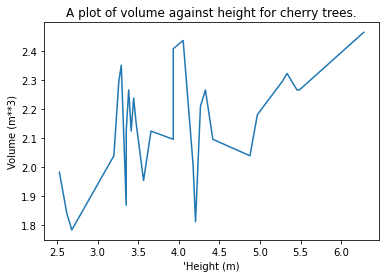

In [20]:
###YOUR CODE GOES HERE
cherry_array = np.loadtxt("labData/cherry_trees.txt", delimiter=" ")
cherry_array = cherry_array[:, 0:2]
cherry_array[:, 0] = cherry_array[:, 0] * 0.3048
cherry_array[:, 1] = cherry_array[:, 1] * 0.3048**3

x_axis = cherry_array[:, 0]
y_axis = cherry_array[:, 1]

plt.plot(x_axis, y_axis)
plt.title("A plot of volume against height for cherry trees.")
plt.xlabel("'Height (m)")
plt.ylabel("Volume (m**3)")
plt.show()

# print(cherry_array)

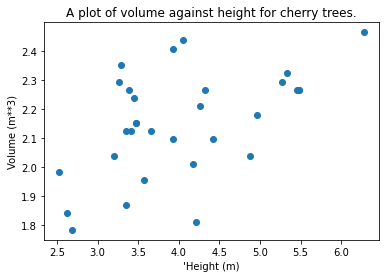

In [22]:
plt.scatter(x_axis, y_axis)
plt.title("A plot of volume against height for cherry trees.")
plt.xlabel("'Height (m)")
plt.ylabel("Volume (m**3)")
plt.show()

#### Task 2: Air passengers

* Data file: `labData/air_passengers.txt`
* Description: The number of international air passengers, each month, 1949 to 1960.
* Columns:

      year   passenger_count


In [30]:
### YOUR CODE GOES HERE
air_passengers_array = np.loadtxt("labData/air_passengers.txt", delimiter=" ")
np.set_printoptions(suppress=True)
print(air_passengers_array[0:5])

[[1949.          112.        ]
 [1949.08333333  118.        ]
 [1949.16666667  132.        ]
 [1949.25        129.        ]
 [1949.33333333  121.        ]]


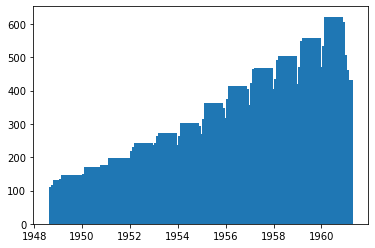

In [32]:
plt.bar(air_passengers_array[:, 0], air_passengers_array[:, 1])
plt.show()

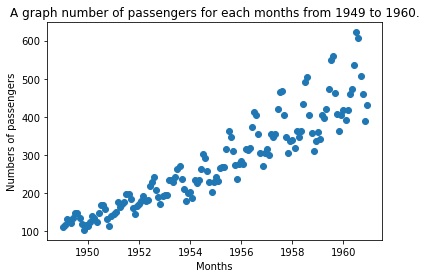

In [33]:
plt.scatter(air_passengers_array[:, 0], air_passengers_array[:, 1])
plt.title("A graph number of passengers for each months from 1949 to 1960.")
plt.xlabel("Months")
plt.ylabel("Numbers of passengers")
plt.show()

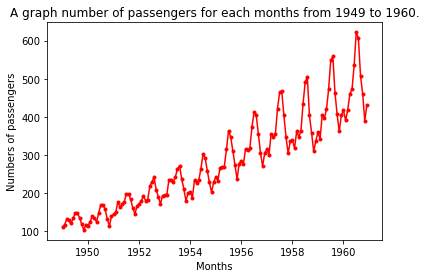

In [46]:
plt.plot(air_passengers_array[:, 0], air_passengers_array[:, 1], marker=".", color="r")
plt.title("A graph number of passengers for each months from 1949 to 1960.")
plt.xlabel("Months")
plt.ylabel("Numbers of passengers")
plt.show()

#### Task 3: Guinea Pigs and Vitamin C

* Data file: `labData/guinea.csv`
* Description: The data measures the length of guinea pig teeth for various doses of Vitamin C, which are administered in two different forms (orange juice or vitamin capsule).
* Columns: 
        index  length of tooth (mm)  supplement type (VC or OJ)  dose (mg/day)
        


Note: There are at least 2 possible ways to visualise this! Feel free to generate multiple plots. 


In [203]:
### YOUR CODE GOES HERE
guinea_array = np.loadtxt("labData/guinea.csv", delimiter=",")
index, tooth_len, sup_type, dose = range(4)

guinea_vc = guinea_array[guinea_array[:, sup_type] == 0.0]
guinea_oj = guinea_array[guinea_array[:, sup_type] == 1.0]
guinea_vc_05 = guinea_vc[guinea_vc[:, dose] == 0.5]
guinea_vc_1 = guinea_vc[guinea_vc[:, dose] == 1.0]
guinea_vc_2 = guinea_vc[guinea_vc[:, dose] == 2.0]
guinea_oj_05 = guinea_oj[guinea_oj[:, dose] == 0.5]
guinea_oj_1 = guinea_oj[guinea_oj[:, dose] == 1.0]
guinea_oj_2 = guinea_oj[guinea_oj[:, dose] == 2.0]

# print(guinea_vc)

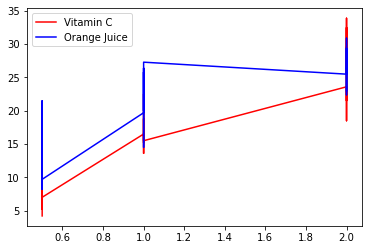

In [181]:
plt.plot(guinea_vc[:, -1], guinea_vc[:, 1], label="Vitamin C", color="r")
plt.plot(guinea_oj[:, -1], guinea_oj[:, 1], label="Orange Juice", color="b")
plt.legend()

plt.show()

(10,) (10,) (10,)
(10,) (10,) (10,)


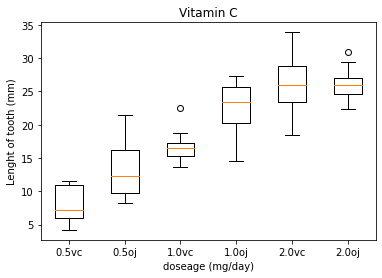

In [171]:
plt.boxplot(
    [guinea_vc_05[:,1], guinea_oj_05[:,1],
     guinea_vc_1[:,1], guinea_oj_1[:,1],
     guinea_vc_2[:,1], guinea_oj_2[:,1]],
    labels=["0.5vc", "0.5oj", "1.0vc", "1.0oj", "2.0vc", "2.0oj"],
)
plt.xlabel("doseage (mg/day)")
plt.ylabel("Lenght of tooth (mm)")
plt.title("Vitamin C")
plt.show()

<ipython-input-243-103b8af86400>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


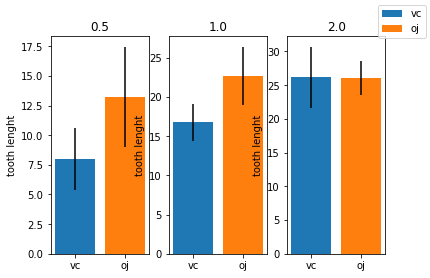

In [243]:
fig, ax = plt.subplots(1,3)
dosage_list = [0.5, 1.0, 2.0]
for i  in range(len(dosage_list)):
    ax[i].bar("vc", guinea_vc[guinea_vc[:, dose] == dosage_list[i]][:,tooth_len].mean(),
              label="vc"+str(dosage_list[i]),
              yerr=guinea_vc[guinea_vc[:, dose] == dosage_list[i]][:,tooth_len].std()
             )
    ax[i].bar("oj", guinea_oj[guinea_oj[:, dose] == dosage_list[i]][:,tooth_len].mean(),
             label="oj"+str(dosage_list[i]),
              yerr=guinea_oj[guinea_oj[:, dose] == dosage_list[i]][:,tooth_len].std()
             )
    ax[i].set_ylabel("tooth lenght")
    ax[i].set_title(str(dosage_list[i]))
    
fig.legend(('vc',"oj"))
fig.show()

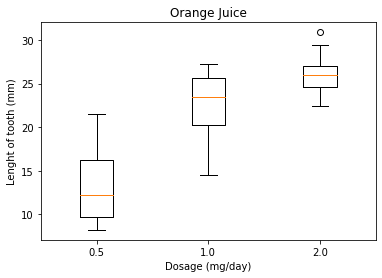

In [155]:
plt.boxplot(
    [guinea_oj_05[:,1], guinea_oj_1[:,1], guinea_oj_2[:,1]], labels=[0.5, 1.0, 2.0]
)
plt.xlabel("Dosage (mg/day)")
plt.ylabel("Lenght of tooth (mm)")
plt.title("Orange Juice")
plt.show()

In [238]:
# help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

#### Task 4: Insects (Optional)

* Data file: `labData/insects.txt`
* Description: The counts of insects on each leaf of a plant in agricultural experimental units treated with
different insecticides.
* Columns:

            insect_count spray_id (0-5)

* Mark the ticks on the x axis using the names of the sprays.

        0 = Insecticator
        1 = Placebo
        2 = BuzzNoMore
        3 = Aprotex
        4 = DieOff
        
        

In [89]:
### YOUR CODE GOES HERE
insects_array = np.loadtxt("labData/insects.txt")
insects_array[: 5]

array([[10.,  0.],
       [ 7.,  0.],
       [20.,  0.],
       [14.,  0.],
       [14.,  0.]])

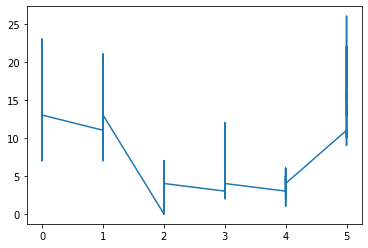

In [92]:
plt.plot(insects_array[:, 1], insects_array[:, 0])
plt.show()

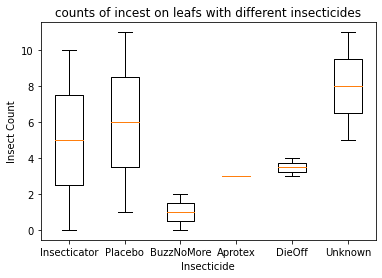

(6, 2) (72, 2)


In [140]:
insecticide_dict = {0: "Insecticator",
                    1: "Placebo",
                    2: "BuzzNoMore",
                    3: "Aprotex",
                    4: "DieOff",
                    5: "Unknown"}
    
stack_array = np.array([insects_array[insects_array[:,1]== insecticide_index][0,:] 
               for insecticide_index in insecticide_dict.keys()])
# plt.boxplot(
#     [insects_array[insects_array[:,1]==0][0, :],
#     insects_array[insects_array[:,1]==1][0, :],
#     insects_array[insects_array[:,1]==2][0, :],
#     insects_array[insects_array[:,1]==3][0, :],
#     insects_array[insects_array[:,1]==4][0, :],
#     insects_array[insects_array[:,1]==5][0, :]],
#     labels=insecticide_dict.values()
# )
plt.boxplot(
    [insects_array[insects_array[:,1]== insecticide_index][0,:] 
               for insecticide_index in insecticide_dict.keys()],
    labels=insecticide_dict.values()
)
plt.xlabel("Insecticide")
plt.ylabel("Insect Count")
plt.title("counts of incest on leafs with different insecticides")
plt.show()
print(stack_array.shape, insects_array.shape)

#### Task 5: Reaction time and sleep (Optional)

Write a short criticism of the plot below the code that has generated it. Suggest possible improvements and a better way of visualising the data. 



* File `labData/sleep_study.txt`
* Columns

         reaction time (ms)    sleep_deprivation (days)  subject_id (id)

* Caption: This plot shows how visual reaction time varies as subjects are deprived of sleep. Up to 10 days of sleep deprivation were tested.

Text(0.5, 0, 'Reaction time')

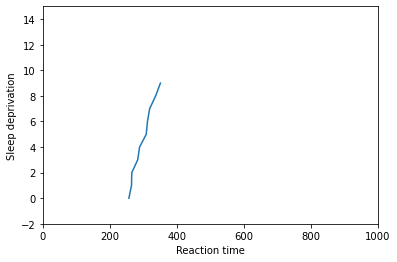

In [141]:
sleep_study = np.loadtxt("labData/sleep_study.txt")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
reaction, sleep, subject = 0,1,2

# group each day
grouped =np.array([sleep_study[sleep_study[:,sleep]==i] for i in range(10)])
# take mean for each day and plot it
mean_reactions = np.mean(grouped, axis=1)[:,0] 
ax.plot(mean_reactions, np.arange(10))

# adjust axes
ax.set_xlim(0,1000)
ax.set_ylim(-2, 15)

ax.set_ylabel("Sleep deprivation")
ax.set_xlabel("Reaction time")

## Criticims
The independent variable (sleep deprivation) should be plotted on the x-axis and the dependent (reaction time) variable should be plotted on the y-axis.

Since the students were kept under different conditions, the plot should have taken that into consideration and plotted each number of sleep deprived days seperately.

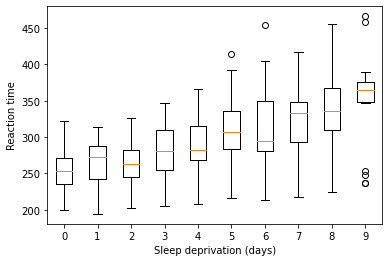

In [150]:
reaction_time, sleep_days, student_id = (0, 1, 2)
plt.boxplot(
    [sleep_study[sleep_study[:, sleep_days]==sleep_day][:, reaction_time] for sleep_day in range(10)],
    labels=range(10)
)
plt.ylabel("Reaction time")
plt.xlabel("Sleep deprivation (days)")
plt.show()

#### Task 6: Visualising earthquakes data (Optional)

Note: this is a slightly more complex problem, so consider doing that in steps and maybe have a look at the matplotlib documentation. 

* * File `labData/quakes.txt`
* Columns

         latitude longitude depth magnitude n_stations


Here we need to visualise **4** variables. Recommended steps: 

* start by plotting the longitute and latitude (first two columns)
    
* When visualising the magnitute, you can vary the size of the dots on the scatterplot. Make sure you apply a scaling to them to make it easier to see the differences in magnitute. 
    
* The code below should help you with showing scaled magnitude.
    
* Finally, to show the depth of the earthquake use a colormap. Have a look at the matplotlib cmap. Note the c and cmap in the signature of the [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
         

In [264]:
# YOUR CODE GOES HERE
lat, lon, depth, mag , n_s = range(5)
quakes_array = np.loadtxt("labData/quakes.txt")
quakes_array[0:5]

array([[-20.42, 181.62, 562.  ,   4.8 ,  41.  ],
       [-20.62, 181.03, 650.  ,   4.2 ,  15.  ],
       [-26.  , 184.1 ,  42.  ,   5.4 ,  43.  ],
       [-17.97, 181.66, 626.  ,   4.1 ,  19.  ],
       [-20.42, 181.96, 649.  ,   4.  ,  11.  ]])

1.0 0.0


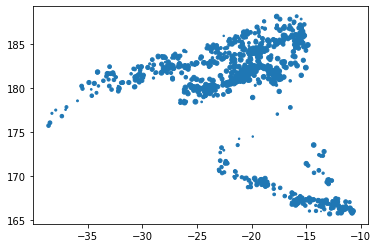

In [300]:
fig, ax = plt.subplots(1,1)
max_mag, min_mag = quakes_array[:, mag].max(), quakes_array[:, mag].min()
rationed_mag =( max_mag - quakes_array[:, mag]) / (max_mag - min_mag)
print(rationed_mag.max(), rationed_mag.min())
ax.scatter(quakes_array[:, lat], quakes_array[:, lon], s=(rationed_mag*5)**2)
# ax[1].scatter(quakes_array[:, lat], quakes_array[:, lon], s=rationed_mag)

In [263]:
def scale_bar(real_scale, visual_scale):
    ls = []
    for scale in visual_scale:
        l = ax.scatter([], [], s=scale, edgecolors="none", facecolors="C0")
        ls.append(l)
    labels = ["%.1f" % i for i in real_scale]
    leg = ax.legend(
        ls,
        labels,
        ncol=len(real_scale),
        frameon=True,
        fontsize=12,
        handlelength=2,
        loc=8,
        borderpad=1.8,
        handletextpad=1,
        title="Magnitude",
        scatterpoints=1,
    )


print(scale_bar(np.linspace(4.1, 7.0, 5), np.linspace(5.0, 150.0, 5)))

None
